For this exercices, we will use an ARIMA Model in order to understand how to do it and also in order to do some changement in the datas, we will use diverse source :

- www.stackoverflow.com for basic code mostly to know how to do basic things for pandas (sources from diverse topic on the website)

 and

- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/



- https://www.kaggle.com/minhvo/arima-model-for-time-series-forecasting

To help create the ARIMA Model and to understand how it work and how to interprete the plot and datas

For ARIMA Model explanation :

- https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

With the help of Senior Carlos Castro Rey, Profesor at Comillas

After Viewing the datas on : 

https://www.sciencedirect.com/science/article/pii/S2352340918315191

We can know that we will need to use the datas of the date and the adr column and the number of days of staying

We import the libraries

In [192]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

We set the display option for more visibility

In [193]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [194]:
path = "./trabajo4.csv"
df = pd.read_csv(path)

We get the data of the original csv

We check the datas, types etc

In [195]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [196]:
df.loc[df['adr'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07
421,Resort Hotel,1,57,2015,July,29,15,0,2,2,0.0,0,FB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,305.0,NaN,0,Transient-Party,0.0,0,0,Canceled,2015-07-13
428,Resort Hotel,0,57,2015,July,29,15,0,2,1,0.0,0,FB,PRT,Groups,Direct,0,0,0,A,A,1,No Deposit,305.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2015-07-17
459,Resort Hotel,0,6,2015,July,29,17,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-17


In [164]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [165]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [166]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [167]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

We drop column that will not be usefull for our project (we might be wrong on the choice we will come back here after if needed)

In [168]:
df=df.drop(['arrival_date_week_number','lead_time','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests'],1)

We change the value of the month to have it in numerical value instead of the string of the name of the month (ex: January to 1)

In [169]:
df['arrival_date_month'].loc[(df['arrival_date_month'] == "January")] = 1
df['arrival_date_month'].loc[(df['arrival_date_month'] == "February")] = 2
df['arrival_date_month'].loc[(df['arrival_date_month'] == "March")] = 3
df['arrival_date_month'].loc[(df['arrival_date_month'] == "April")] = 4
df['arrival_date_month'].loc[(df['arrival_date_month'] == "May")] = 5
df['arrival_date_month'].loc[(df['arrival_date_month'] == "June")] = 6
df['arrival_date_month'].loc[(df['arrival_date_month'] == "July")] = 7
df['arrival_date_month'].loc[(df['arrival_date_month'] == "August")] = 8
df['arrival_date_month'].loc[(df['arrival_date_month'] == "September")] = 9
df['arrival_date_month'].loc[(df['arrival_date_month'] == "October")] = 10
df['arrival_date_month'].loc[(df['arrival_date_month'] == "November")] = 11
df['arrival_date_month'].loc[(df['arrival_date_month'] == "December")] = 12

C:\Users\hugue\AppData\Local\Python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


We check that the change went well

In [170]:
df["arrival_date_month"].unique()

array([7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6], dtype=object)

In [171]:
df.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status,reservation_status_date
0,Resort Hotel,0,2015,7,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,2015,7,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,2015,7,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,75.0,Check-Out,2015-07-02
3,Resort Hotel,0,2015,7,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,75.0,Check-Out,2015-07-02
4,Resort Hotel,0,2015,7,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,98.0,Check-Out,2015-07-03


We create of new column which the value is a concatenation of the 3 others date column in order to have one clean column for the complete date

In [172]:
arrival_date = pd.to_datetime(df.arrival_date_year*10000+df.arrival_date_month*100+df.arrival_date_day_of_month,format='%Y%m%d')
df["arrival_date"] = arrival_date

We remove the original 3 date columns because we have the new column

In [173]:
df = df.drop(["arrival_date_year","arrival_date_month","arrival_date_day_of_month"], 1)

In [174]:
df.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,0,1,1,0.0,0,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,75.0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,75.0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,98.0,Check-Out,2015-07-03,2015-07-01


We create a new csv with all these transformed datas to secure the changes

In [175]:
df.to_csv("./tb4_new.csv")

We use the new csv now

In [176]:
path = "./tb4_new.csv"
df = pd.read_csv(path)

We will try to use the date and adr to start to graph in order to have a better viex of the datas

First let's remove everythong that we don't need, we will probably put them back later but for now we don't need them

In [177]:
df = df.drop(["is_canceled","adults","children","babies","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","reservation_status_date"],1)

In [178]:
df.head()

,Unnamed: 0,hotel,stays_in_weekend_nights,stays_in_week_nights,adr,arrival_date
0,0,Resort Hotel,0,0,0.0,2015-07-01
1,1,Resort Hotel,0,0,0.0,2015-07-01
2,2,Resort Hotel,0,1,75.0,2015-07-01
3,3,Resort Hotel,0,1,75.0,2015-07-01
4,4,Resort Hotel,0,2,98.0,2015-07-01


We can see that because of the creation of the new csv we have a new column so we will delete it 

In [179]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adr,arrival_date
0,Resort Hotel,0,0,0.0,2015-07-01
1,Resort Hotel,0,0,0.0,2015-07-01
2,Resort Hotel,0,1,75.0,2015-07-01
3,Resort Hotel,0,1,75.0,2015-07-01
4,Resort Hotel,0,2,98.0,2015-07-01


We plot our first graph to see the distribution of the adr by the date

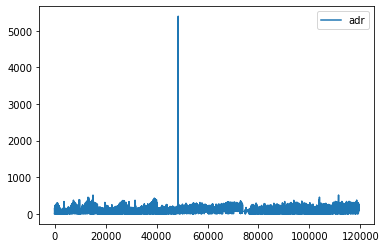

In [180]:
df_to_plot = df
df_to_plot = df_to_plot.drop(["stays_in_weekend_nights","stays_in_week_nights"], 1)
df_to_plot.plot()
plt.show()

We can see that we have an unusual value here so we will have a look at this

Check the value

In [181]:
df["adr"].max()

5400.0

Check at which row is this unusual value in the original csv

In [182]:
df_origin = pd.read_csv("./trabajo4.csv")


In [183]:
df_origin.loc[df_origin['adr'] == 510.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
111403,City Hotel,0,0,2017,May,19,9,0,1,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,G,0,No Deposit,159.0,NaN,0,Transient,510.0,0,0,Check-Out,2017-05-10


Here we can see a value of 5400.0 for the adr where the cancelation is at 1 so it's obvously an error we will delete that row

In [184]:
df = df.drop(df[df.adr == 5400.0].index)

Check if the delete went right

In [185]:
df["adr"].max()

510.0

Replot

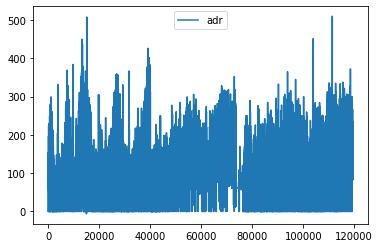

In [186]:
df_to_plot = df
df_to_plot = df_to_plot.drop(["stays_in_weekend_nights","stays_in_week_nights"], 1)
df_to_plot.plot()
plt.show()

They're seems to have no unusual value, we can continue

We do adr = adr * (nb of stayin week + nb of stayin week end)

In [187]:
nb_stay = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["adr"] = df["adr"] * nb_stay
df = df.drop(["stays_in_weekend_nights","stays_in_week_nights"], 1)

We do the sum of adr groupby date To have only one data per date group by the month and the year

In [188]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_date'] = pd.DatetimeIndex(df['arrival_date']).to_period("M")
df = df.groupby(['arrival_date', 'hotel'], as_index=False)
df = df.sum()
df.head()

,arrival_date,hotel,adr
0,2015-07,City Hotel,261597.86
1,2015-07,Resort Hotel,885263.67
2,2015-08,City Hotel,522375.86
3,2015-08,Resort Hotel,1176179.48
4,2015-09,City Hotel,1028107.17


In [189]:
df = df.pivot(index='arrival_date', columns='hotel', values='adr')

<AxesSubplot:xlabel='arrival_date'>

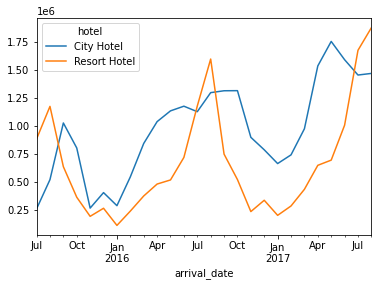

In [190]:
df.plot()

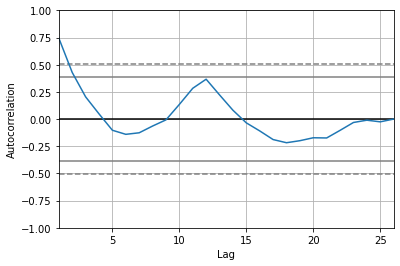

In [191]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [159]:
model = ARIMA(df, order=(2,1,0))
model_fit = model.fit()

ValueError: SARIMAX models require univariate `endog`. Got shape (26, 2).

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    adr   No. Observations:                   26
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -357.926
Date:                Fri, 05 Nov 2021   AIC                            721.852
Time:                        00:49:00   BIC                            725.509
Sample:                    07-31-2015   HQIC                           722.867
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3123      0.234      1.335      0.182      -0.146       0.771
ar.L2          0.0676      0.238      0.284      0.777      -0.399       0.535
sigma2      1.677e+11   3.21e-13   5.23e+23      0.0

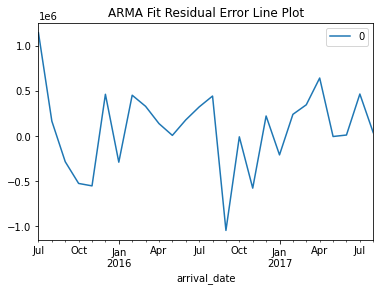

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

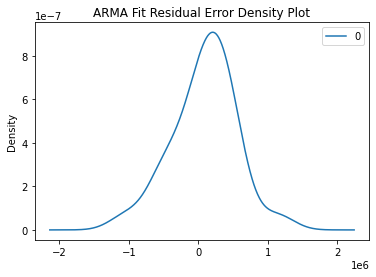

                  0
count  2.600000e+01
mean   8.339250e+04
std    4.525454e+05
min   -1.043631e+06
25%   -1.566882e+05
50%    1.538063e+05
75%    3.442737e+05
max    1.146862e+06


In [ ]:
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())